# Intro data science - portfolio assignment 15: Training a decision tree on the penguins dataset

30 min: Train a decision tree to predict the species of a penguin based on their characteristics.

- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. Note: Some machine learning algorithms can not handle missing values. You will either need to:
-- replace missing values(with the mean or most popular value). For replacing missing values you can use .fillna() https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
-- remove rows with missing data. You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accuracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the penguin based on the other columns.

In [13]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset('penguins')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Filling the blanks

First, we will fill the missing values of each column with the mean of that column.

In [14]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean())

In [15]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


For sex, we will look at the most popular value and use that value to fill the missing values.

In [16]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

Looks about equal, so I will just fill the missing values with Male.

In [17]:
penguins['sex'] = penguins['sex'].fillna(value='Male')

In [18]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


## Training the model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
features = ['bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 1)
dt.fit(penguins[features], penguins['species'])

DecisionTreeClassifier(max_depth=1)

In [21]:
from sklearn import tree

def plot_tree_classification(model, features, class_names):
    # generate plot data
    graph = tree.plot_tree(model,
                          feature_names=features,
                          class_names=class_names,
                          filled=True)
    
    # display in the notebook
    return graph

[Text(167.4, 163.07999999999998, 'bill_length_mm <= 42.35\ngini = 0.636\nsamples = 344\nvalue = [152, 68, 124]\nclass = Adelie'),
 Text(83.7, 54.360000000000014, 'gini = 0.055\nsamples = 143\nvalue = [139, 1, 3]\nclass = Adelie'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.522\nsamples = 201\nvalue = [13, 67, 121]\nclass = Gentoo')]

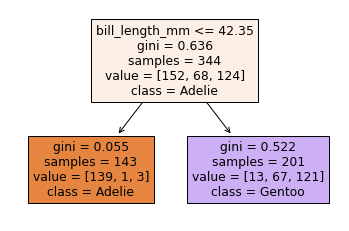

In [22]:
plot_tree_classification(dt, features, penguins.species.unique())

Evaluating the model

In [23]:
predictions = dt.predict(penguins[features])

In [24]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [26]:
calculate_accuracy(predictions, penguins.species)

0.7558139534883721

Note: Using accuracy is actually not the best way to evaluate a classification model. However, for this course it will serve as a easy-to-understand first measurement.

Evaluating our model on the same data that it was trained on, actually provides an overoptimistic estimate of our model's performance. Our intent is to use our model on data that it has not yet seen before, so we should evaluate our model in the same way.

## Test/train split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)

print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


In [42]:
features = ['bill_length_mm']
dt_classification = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=3)

In [43]:
predictionsOnTrainSet = dt_classification.predict(penguins_train[features])
predictionsOnTestSet = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainSet, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestSet, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8291666666666667
Accuracy on test set 0.7211538461538461


The accuracy on the test set is lower. This is expected, because this is a different dataset than the one we trained our model on.